# Backtracking

Is a systematic approach to enumerate possibilities.

+ All k-tuples with n items
+ All sets with n items
+ All permutations with n items
+ All ways of coloring n items with k colors
+ All non-attacking positions of n queens on an n-by-n chessboard

Backtracking is very useful. Once you understand the template of backtracking, you can use the same template to solve many different problems.

### Generate all k-tuples with n items

Items: 0, 1, ..., n-1

Example: k=2, n=3.

Definin the API:

solution is a k-tuple, which is a list with k items. An item is a number from 0 to n-1.

all_tuples(solution, n, i) -- generate all k-tuples with the first i entries in the tuples have been filled.



In [2]:
def all_tuples(solution, n, i):
    if i==len(solution):
        print(tuple(solution))
    else:
        possibilities = range(n)
        for possibility in possibilities:
            solution[i] = possibility
            all_tuples(solution, n, i+1)

In [3]:
all_tuples([None, None, None], 2, 0)

(0, 0, 0)
(0, 0, 1)
(0, 1, 0)
(0, 1, 1)
(1, 0, 0)
(1, 0, 1)
(1, 1, 0)
(1, 1, 1)


2-tuples have 2 slots.

Each slot can have one of three items: 0, 1, 2.



This function call generates all 2-tuples with 3 things.

```
all_tuples([None, None], 3, 0)
```

The 3rd parameter means that we start the generation of 2-tuples from index 0, or level 0.

Backtracking is an incremental way of constructing solutions starting from "level" 0.


The API:
```
def all_tuples(solution, n, i):
    pass
```

**all_tuples(solution, n, i) generates (prints) all solutions where levels 0, 1, ..., i-1 have already been "configured".**

**In other words, all_tuples(solution, n, i) generates (prints) all solutions with the same setting/configuration specified in solution from index 0, 1, ..., i-1.**


Our goal: to understand the backtracking template.  Once we understand this, we understand backtracking and how to use it to solve many different problems.

In [1]:
def all_tuples(solution, n, i):
    if i==len(solution):
        print(tuple(solution))
    else:
        for possibility in range(n):
            solution[i] = possibility
            all_tuples(solution, n, i+1)

In [2]:
# generate 3-tuples with 2 items (0 and 1)
n = 2
solution = [None, None, None]
all_tuples(solution, n, 0)

(0, 0, 0)
(0, 0, 1)
(0, 1, 0)
(0, 1, 1)
(1, 0, 0)
(1, 0, 1)
(1, 1, 0)
(1, 1, 1)


In [3]:
# generate 3-tuples with 2 items (0 and 1), with the requirement that the first two
# items are 1 and 0.  
# We have "configured" levels 0 and 1.
n = 2
solution = [1, 0, None]
all_tuples(solution, n, 2)

(1, 0, 0)
(1, 0, 1)


In [4]:
# generate 3-tuples with 2 items (0 and 1), with the requirement that the first item is "apple"
# We have "configured" level 0 with "apple"
n = 2
solution = ["apple", None, None]
all_tuples(solution, n, 1)

('apple', 0, 0)
('apple', 0, 1)
('apple', 1, 0)
('apple', 1, 1)


These are examples of what the API means.

To understand backtracking we need to understand this backtracking API.

The API:
```
def all_tuples(solution, n, i):
    pass
```

**all_tuples(solution, n, i) generates (prints) all solutions where levels 0, 1, ..., i-1 have already been "configured".**

Here's how the backtracking algorithm works:

1. If i == len(solution), what does this mean? everything is configured. We are done and nothing else needs to done. The solution is complete.  All we have to do is print it out.

In [ ]:
def all_tuples(solution, n, i):
    if i==len(solution):
        print(tuple(solution))
    else:
        pass


2. If i < len(solution), then we need to configure the solution at level i.
    + How do we configure the solution at level i?  What to we place in solution[i]?
    + Answer: any possible thing we can put there. Reason: we want to generate all possible solutions. So we'll place any possible thing that can be placed in solution[i].

3. Recursive idea: for each possibility at solution[i], we use the same technique/procedure, to generate all solutions starting from level i+1.

In [7]:
def all_tuples(solution, n, i):
    if i==len(solution):
        print(tuple(solution))
    else:
        for p in range(n):    # we go through all possibilities to configure level i
            solution[i] = p
            all_tuples(solution, n, i+1)

In [6]:
all_tuples([None, None, None, None], 2, 0)

(0, 0, 0, 0)
(0, 0, 0, 1)
(0, 0, 1, 0)
(0, 0, 1, 1)
(0, 1, 0, 0)
(0, 1, 0, 1)
(0, 1, 1, 0)
(0, 1, 1, 1)
(1, 0, 0, 0)
(1, 0, 0, 1)
(1, 0, 1, 0)
(1, 0, 1, 1)
(1, 1, 0, 0)
(1, 1, 0, 1)
(1, 1, 1, 0)
(1, 1, 1, 1)


### Exercise: generate all 3-tuples consisting of apple, banana, orange.

In [13]:
def fruits_of_3(solution, i):
    if i==len(solution):
        print(tuple(solution))
    else:
        for p in ['apple','banana','orange']:    # we go through all possibilities to configure level i
            solution[i] = p
            fruits_of_3(solution, i+1)

In backtracking, the most important question is: what do we place at level i?  i.e. how to we configure solution[i]?


In [14]:
fruits_of_3([None, None, None], 0)

('apple', 'apple', 'apple')
('apple', 'apple', 'banana')
('apple', 'apple', 'orange')
('apple', 'banana', 'apple')
('apple', 'banana', 'banana')
('apple', 'banana', 'orange')
('apple', 'orange', 'apple')
('apple', 'orange', 'banana')
('apple', 'orange', 'orange')
('banana', 'apple', 'apple')
('banana', 'apple', 'banana')
('banana', 'apple', 'orange')
('banana', 'banana', 'apple')
('banana', 'banana', 'banana')
('banana', 'banana', 'orange')
('banana', 'orange', 'apple')
('banana', 'orange', 'banana')
('banana', 'orange', 'orange')
('orange', 'apple', 'apple')
('orange', 'apple', 'banana')
('orange', 'apple', 'orange')
('orange', 'banana', 'apple')
('orange', 'banana', 'banana')
('orange', 'banana', 'orange')
('orange', 'orange', 'apple')
('orange', 'orange', 'banana')
('orange', 'orange', 'orange')


### Main idea of backtracking

* backtrack(solution, i) generates all solutions where levels 0, 1, ..., i-1 have been complete.

* backtrack(solution, i) attempts to try all possibilities for solutions at level i.  

* backtrack(solution, i) uses the same strategy to generate all solutions starting at level i+1.  Note: after level i is assigned a possibility, the solution is set for levels 0, 1, ..., i.

* backtrack incrementally generates solutions starting at level 0.


(0, 0, 0)
(0, 0, 1)
(0, 1, 0)
(0, 1, 1)
(1, 0, 0)
(1, 0, 1)
(1, 1, 0)
(1, 1, 1)
callviz: Rendering in inline in Jupyter Notebook


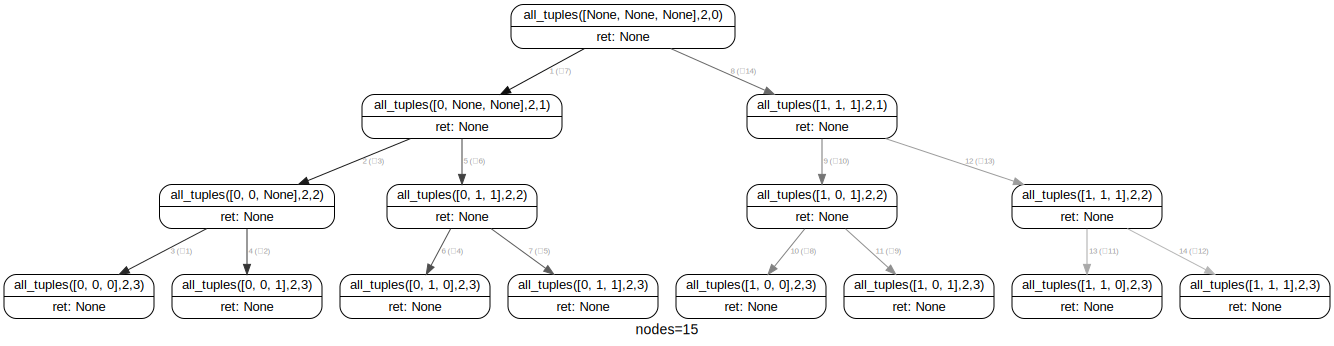

In [2]:
from rcviz import viz

@viz()
def all_tuples(solution, n, i):
    if i==len(solution):
        print(tuple(solution))
    else:
        possibilities = range(n)
        for possibility in possibilities:
            solution[i] = possibility
            all_tuples(solution, n, i+1)
            
all_tuples([None, None, None], 2, 0)
viz.render()